In [1]:
# Machine learning for each of these countries
# global-- DONE, US--DONE, EU--DONE, China, India

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [6]:
temp = pd.read_csv("cleaned_temp.csv")

In [8]:
in_data = temp[['Year', 'India']]
in_data.head()

,Year,India
0,1965,-0.036417
1,1966,0.259417
2,1967,-0.138000
3,1968,-0.285167
4,1969,0.327833


In [14]:
X = in_data.Year.values.reshape(-1, 1)
y = in_data.India.values.reshape(-1, 1)

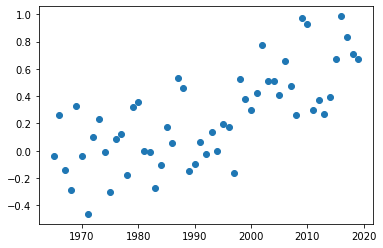

In [11]:
plt.scatter(X, y)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [16]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [17]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

In [18]:
# Calculate the y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

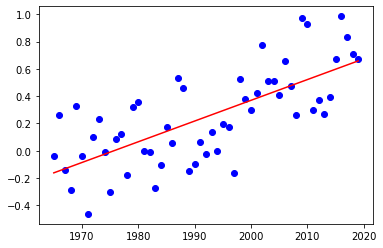

In [19]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [20]:
y_2030 = model.predict([[2030]])
y_2040 = model.predict([[2040]])
y_2050 = model.predict([[2050]])

In [21]:
my_array1 = y_2030
my_array2 = y_2040
my_array3 = y_2050

df1 = pd.DataFrame(my_array1, columns = ['2030'])
df2 = pd.DataFrame(my_array2, columns = ['2040'])
df3 = pd.DataFrame(my_array3, columns = ['2050'])

frames = [df1, df2, df3]
result = pd.concat(frames, axis=1).T
reset = result.reset_index()
# You need to rename the 0 with the same name as the column in the country df
renamed = reset.rename(columns={"index": "Year", 0: "India"})

# renamed.head()
# eu_data.head()

# Create new df
data = [in_data, renamed]
all_data = pd.concat(data, axis=0)
all_data.tail()

,Year,India
53,2018,0.712083
54,2019,0.674667
0,2030,0.826061
1,2040,0.978153
2,2050,1.130245


In [22]:
# Save .csv
in_output = all_data.to_csv("in_temp.csv")